# งบประมาณของกทมประจำปี 2563_Word Could

In [1]:
# !pip install pythainlp

In [2]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import pandas as pd
import numpy as np

In [4]:
# ดาว์โหลดไฟล์ csv  จาก 1_bangkok_final
df = pd.read_csv('./df1.csv')
print(df.head(5))

   Unnamed: 0  Index หน่วยงาน  รายจ่ายหน่วยงาน  แผนงาน ประเภทรายจ่าย  \
0           0      1   งบกลาง      14878887438  งบกลาง        งบกลาง   
1           1      1   งบกลาง      14878887438  งบกลาง        งบกลาง   
2           2      1   งบกลาง      14878887438  งบกลาง        งบกลาง   
3           3      1   งบกลาง      14878887438  งบกลาง        งบกลาง   
4           4      1   งบกลาง      14878887438  งบกลาง        งบกลาง   

                                             โครงการ รายจ่ายโครงการ  \
0                                เงินสำรองจ่ายท่ัวไป    486,536,500   
1                   เงินช่วยเหลือข้าราชการและลูกจ้าง  2,700,000,000   
2                                 เงินบำเหน็จลูกจ้าง    650,000,000   
3                             ค่าติดต้ังไฟฟ้าสาธารณะ    200,000,000   
4  เงินสำรองสำหรับค่างานส่วนท่ีเพ่ิมตามสัญญาแบบปร...     20,000,000   

        งบประมาณ  
0  กรุงเทพมหานคร  
1  กรุงเทพมหานคร  
2  กรุงเทพมหานคร  
3  กรุงเทพมหานคร  
4  กรุงเทพมหานคร  


In [5]:
import re
# เพิ่มคำที่ช่วยในการตัดคำให้มีประสิทธิภาพมากขึ้น
ad=[]
with open("./token_add.txt", "r") as file:
   for line in file:
        line=re.sub('\n','',line)
        ad.append(line)    
add_word=set(ad)

In [6]:
# !pip install stop_words
# !pip install deepcut

In [8]:
from pythainlp.tokenize import word_tokenize
import pythainlp
from pythainlp.util import dict_trie
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import Tokenizer

# ๖ัดคำโดยใช้ pythainlp
custom_dict = set(thai_words())
custom_dict .update(add_word)
trie = dict_trie(dict_source=custom_dict)
text= df['โครงการ'].tolist() 
# print(text)
p=[]
for i,x in enumerate(text):
  _tokenizer = Tokenizer(custom_dict=trie, engine='newmm')
  g=_tokenizer.word_tokenize(x)
  p.append(g)

In [9]:
# แปลงข้อมูลให้อยู่ในรูป list และลบ  !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
import string
def twolist_to_list(lis):
    b = []
    for xs in lis:
        for x in xs:
            s = re.sub('[%s]' % re.escape(string.punctuation), '', str(x))
            b.append(s)
    return b
h=twolist_to_list(p)
# print(h)


In [10]:
# !pip install stop_words

In [11]:
# เพิ่มคำที่ต้องการตัดออกใน stopwords
from pythainlp.corpus import thai_stopwords
stopwords= set(thai_stopwords()) 
words = ['งาน','โครงการ','โครง', 'ท่ี','เพ่','ทั่ว','ิส','ิม','นว','ล','โรง','งานการ','ที่','ทั่ว','ตัน','ผู้','ไป','']
stopwords.update(words)
print(len(stopwords))

1043


In [12]:
#  ตัดคำที่อยู่ใน stopword ออก
filtered_sentence = [w for w in h if len(h)>3]
filtered_sentence = [w for w in filtered_sentence if not w in stopwords]
# filtered_sentence

In [13]:
# หาคำที่มีความถี่มากที่สุด 10 อันดับ
import nltk
fdist1 = nltk.FreqDist(filtered_sentence)
f=fdist1.most_common()
# print(f)
gh=pd.DataFrame(f,columns=['word','frequency'])
print(gh.head(10))
# gh.to_csv('frequency.csv')

         word  frequency
0   งานบริหาร        177
1    ก่อสร้าง        118
2        ระบบ         84
3      ควบคุม         75
4         ถนน         68
5       พัฒนา         64
6        คลอง         59
7  บำรุงรักษา         57
8    ระบายน้ำ         54
9     การคลัง         53


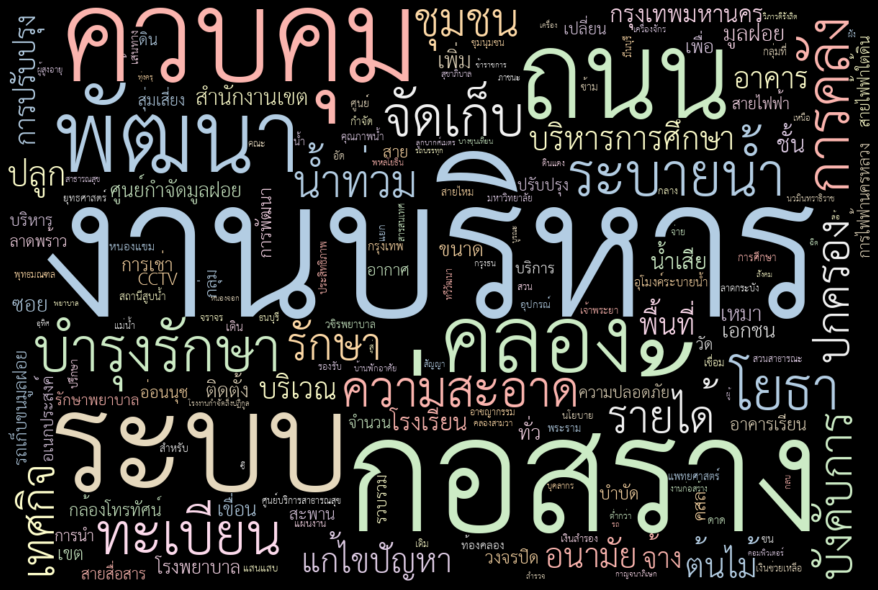

In [15]:
#  wordcolud ที่แสดงคำที่มีความถี่สูงสุด
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(font_path='./THSarabunNew.ttf',
                  width = 1200, height = 800, 
                background_color ='black', 
                colormap='Pastel1',
                regexp=regexp,
                collocations=False,
                # mask=mask
                min_font_size = 15
                ).generate(' '.join(filtered_sentence))
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
wordcloud.to_file("output.png") 

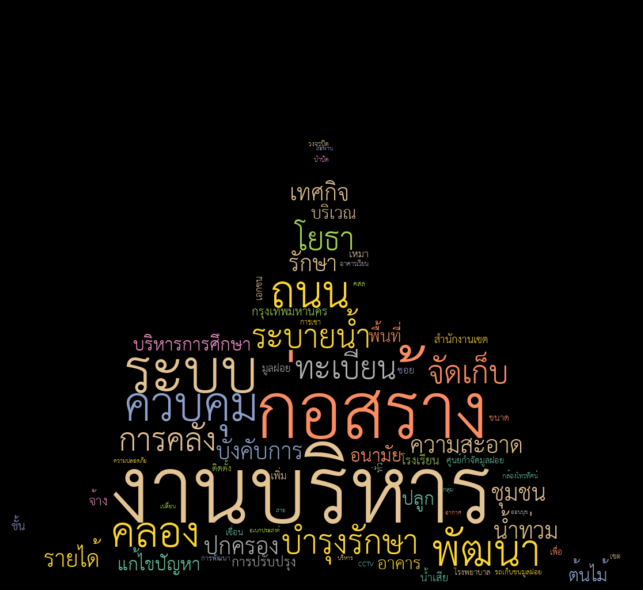

In [17]:
from PIL import Image
regexp = r"[ก-๙a-zA-Z']+"
mask = np.array(Image.open('./kisspng-thailand-clip-art-thailand-golden-palace-5a7ce1e8a16771.6471186115181337366611.png'))
wordcloud = WordCloud(font_path='./THSarabunNew.ttf',
                  width = 1200, height = 800, 
                background_color ='black', 
                colormap='Set2',
                regexp=regexp,
                collocations=False,
                mask=mask,
                min_font_size = 15
                ).generate(' '.join(filtered_sentence))
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
# plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
wordcloud.to_file("output_mask.png") 